In [ ]:
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import statistics

In [ ]:
#Import
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1R3dFKXmnxnC6K4CZyrBs4vumlY7amRYyyTr_prH-6J4/edit#gid=0'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
rfm = pd.read_csv(sheet_url_out_trf)
rfm

,Row ID,Order ID,Customer Name,Order Date,Sales,Profit
0,1,3,Muhammed MacIntyre,13/10/2010,261.5400,-213.25
1,49,293,Barry French,01/10/2012,10123.0200,457.81
2,50,293,Barry French,01/10/2012,244.5700,46.71
3,80,483,Clay Rozendal,10/07/2011,4965.7595,1198.97
4,85,515,Carlos Soltero,28/08/2010,394.2700,30.94
...,...,...,...,...,...,...
8394,7765,55558,Mick Brown,09/08/2010,1294.0400,-323.18
8395,7766,55558,Mick Brown,09/08/2010,392.5700,22.25
8396,7906,56550,Frank Hawley,08/04/2011,823.7800,343.05
8397,7907,56550,Frank Hawley,08/04/2011,469.8375,-159.24


In [ ]:
#Import
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1FGhqXp8hXRod8gMP2nShHQwfLJh1JKyJlJ9OxF9gbQU/edit#gid=0'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
customer = pd.read_csv(sheet_url_out_trf)
customer

,Customer ID,Customer Name
0,1,Muhammed MacIntyre
1,2,Barry French
2,3,Clay Rozendal
3,4,Carlos Soltero
4,5,Carl Jackson
...,...,...
790,791,Cyma Kinney
791,792,Shui Tom
792,793,Victoria Brennan
793,794,Adrian Shami


In [ ]:
#Import
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1nQ_YLSnDNKKPycF0iT8R6VskLpYjW-OX_OTQXU93vTg/edit#gid=0'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
returned = pd.read_csv(sheet_url_out_trf)
returned

,Order ID,Status
0,65,Returned
1,69,Returned
2,134,Returned
3,135,Returned
4,230,Returned
...,...,...
567,59680,Returned
568,59683,Returned
569,59776,Returned
570,59879,Returned


In [ ]:
rfm_join = rfm.merge(customer,on='Customer Name')
rfm_join

,Row ID,Order ID,Customer Name,Order Date,Sales,Profit,Customer ID
0,1,3,Muhammed MacIntyre,13/10/2010,261.54,-213.25,1
1,1928,13795,Muhammed MacIntyre,10/04/2011,501.32,-119.08,1
2,1929,13795,Muhammed MacIntyre,10/04/2011,275.16,43.35,1
3,1930,13795,Muhammed MacIntyre,10/04/2011,1302.99,545.49,1
4,2384,17286,Muhammed MacIntyre,21/09/2010,1810.67,-541.87,1
...,...,...,...,...,...,...,...
8394,7438,53026,Adrian Shami,26/02/2012,322.82,-17.58,794
8395,7933,56706,Adrian Shami,10/11/2009,754.92,-129.57,794
8396,2800,20193,Harry Greene,07/11/2010,82.12,-121.59,795
8397,7396,52706,Harry Greene,09/07/2012,1041.66,480.53,795


In [ ]:
return_join = rfm_join.merge(returned,on='Order ID')
return_join

,Row ID,Order ID,Customer Name,Order Date,Sales,Profit,Customer ID,Status
0,1770,12704,Carlos Soltero,09/02/2010,21506.7700,1260.51,4,Returned
1,1771,12704,Carlos Soltero,09/02/2010,669.0200,-1274.02,4,Returned
2,3662,26240,Carlos Soltero,19/12/2009,1483.4400,439.77,4,Returned
3,3663,26240,Carlos Soltero,19/12/2009,145.6800,12.00,4,Returned
4,7161,51075,Carlos Soltero,23/11/2010,1290.2065,-160.68,4,Returned
...,...,...,...,...,...,...,...,...
867,5043,35936,Roy Phan,21/01/2009,4152.5500,813.33,783,Returned
868,7371,52518,Roy Phan,03/04/2012,168.9900,-47.37,783,Returned
869,4974,35366,Raymond Book,12/07/2011,149.3100,-98.42,786,Returned
870,1652,11909,Stephanie Phelps,24/11/2009,194.1740,-20.91,788,Returned


In [ ]:
rfm_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8399 non-null   int64  
 1   Order ID       8399 non-null   int64  
 2   Customer Name  8399 non-null   object 
 3   Order Date     8399 non-null   object 
 4   Sales          8399 non-null   float64
 5   Profit         8399 non-null   float64
 6   Customer ID    8399 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 524.9+ KB


In [ ]:
rfm_join['Order Date'] = pd.to_datetime(rfm_join['Order Date'])
rfm_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8399 non-null   int64         
 1   Order ID       8399 non-null   int64         
 2   Customer Name  8399 non-null   object        
 3   Order Date     8399 non-null   datetime64[ns]
 4   Sales          8399 non-null   float64       
 5   Profit         8399 non-null   float64       
 6   Customer ID    8399 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 524.9+ KB


In [ ]:
#recency
df_recent = rfm_join.loc[rfm_join.groupby('Customer ID')['Order Date'].idxmax(),:].reset_index()
df_recent['recency'] = (df_recent['Order Date'].max()-df_recent['Order Date']).dt.days
df_recent = df_recent[['Customer ID','recency']]
df_recent

,Customer ID,recency
0,1,356
1,2,150
2,3,450
3,4,61
4,5,39
...,...,...
790,791,318
791,792,251
792,793,139
793,794,34


In [ ]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer ID  795 non-null    int64
 1   recency      795 non-null    int64
dtypes: int64(2)
memory usage: 12.5 KB


In [ ]:
rfm_join

,Row ID,Order ID,Customer Name,Order Date,Sales,Profit,Customer ID
0,1,3,Muhammed MacIntyre,2010-10-13,261.54,-213.25,1
1,1928,13795,Muhammed MacIntyre,2011-10-04,501.32,-119.08,1
2,1929,13795,Muhammed MacIntyre,2011-10-04,275.16,43.35,1
3,1930,13795,Muhammed MacIntyre,2011-10-04,1302.99,545.49,1
4,2384,17286,Muhammed MacIntyre,2010-09-21,1810.67,-541.87,1
...,...,...,...,...,...,...,...
8394,7438,53026,Adrian Shami,2012-02-26,322.82,-17.58,794
8395,7933,56706,Adrian Shami,2009-10-11,754.92,-129.57,794
8396,2800,20193,Harry Greene,2010-07-11,82.12,-121.59,795
8397,7396,52706,Harry Greene,2012-09-07,1041.66,480.53,795


In [ ]:
#drop irrelevant
df_money_column = rfm_join.columns.tolist()
df_money_clean = rfm_join.drop(columns=df_money_column[0:4])
df_money_clean

,Sales,Profit,Customer ID
0,261.54,-213.25,1
1,501.32,-119.08,1
2,275.16,43.35,1
3,1302.99,545.49,1
4,1810.67,-541.87,1
...,...,...,...
8394,322.82,-17.58,794
8395,754.92,-129.57,794
8396,82.12,-121.59,795
8397,1041.66,480.53,795


In [ ]:
df_money_column2 = df_money_clean.columns.tolist()
df_money_clean2 = df_money_clean.drop(columns=df_money_column2[1:2])
df_money_clean2

,Sales,Customer ID
0,261.54,1
1,501.32,1
2,275.16,1
3,1302.99,1
4,1810.67,1
...,...,...
8394,322.82,794
8395,754.92,794
8396,82.12,795
8397,1041.66,795


In [ ]:
#Frequency
df_money = df_money_clean2.groupby(['Customer ID']).sum()
df_money = pd.DataFrame(df_money).reset_index()
df_money.rename(columns = {'Sales' : 'monetary'}, inplace = True)
df_money

,Customer ID,monetary
0,1,8796.4200
1,2,15179.6100
2,3,6611.4365
3,4,55575.0880
4,5,14451.4165
...,...,...
790,791,2310.2300
791,792,27672.4400
792,793,9011.4200
793,794,4615.5400


In [ ]:
df_freq = rfm_join.groupby(['Customer ID']).count()
df_freq = pd.DataFrame(df_freq).reset_index()
df_freq = df_freq[['Customer ID', 'Order ID']]
df_freq.rename(columns = {'Order ID' : 'frequency'}, inplace = True)
df_freq

,Customer ID,frequency
0,1,13
1,2,4
2,3,5
3,4,33
4,5,8
...,...,...
790,791,6
791,792,9
792,793,11
793,794,6


In [ ]:
cluster_join = df_recent.merge(df_freq,on='Customer ID').merge(df_money, on='Customer ID')
cluster_join

,Customer ID,recency,frequency,monetary
0,1,356,13,8796.4200
1,2,150,4,15179.6100
2,3,450,5,6611.4365
3,4,61,33,55575.0880
4,5,39,8,14451.4165
...,...,...,...,...
790,791,318,6,2310.2300
791,792,251,9,27672.4400
792,793,139,11,9011.4200
793,794,34,6,4615.5400


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


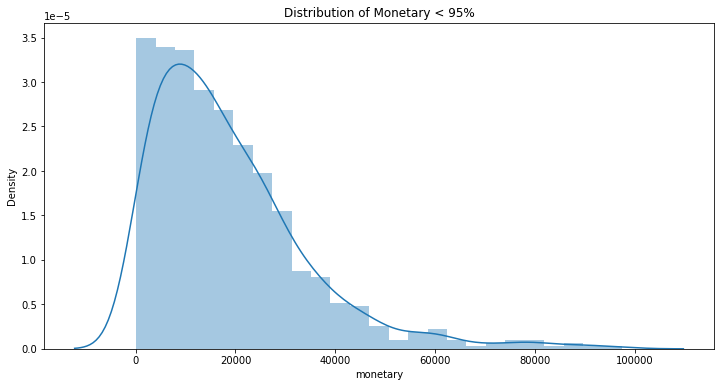

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(cluster_join[cluster_join['monetary']<100000].monetary);

#**RFM**

In [ ]:
numerical_col = ['recency','frequency','monetary']
numerical_col

['recency', 'frequency', 'monetary']

In [ ]:
cluster_scale = cluster_join.copy()
scaler = MinMaxScaler()
cluster_scale[numerical_col] = scaler.fit_transform(cluster_scale[numerical_col])
cluster_scale

,Customer ID,recency,frequency,monetary
0,1,0.253742,0.300,0.074426
1,2,0.106914,0.075,0.128965
2,3,0.320741,0.100,0.055757
3,4,0.043478,0.800,0.474111
4,5,0.027798,0.175,0.122743
...,...,...,...,...
790,791,0.226657,0.125,0.019007
791,792,0.178902,0.200,0.235706
792,793,0.099073,0.250,0.076263
793,794,0.024234,0.125,0.038704


In [ ]:
### Drop the column that are not needed
cluster_check = cluster_scale.copy()
cluster_check = cluster_scale.drop(['Customer ID'],axis=1)
cluster_check.head()

,recency,frequency,monetary
0,0.253742,0.300,0.074426
1,0.106914,0.075,0.128965
2,0.320741,0.100,0.055757
3,0.043478,0.800,0.474111
4,0.027798,0.175,0.122743


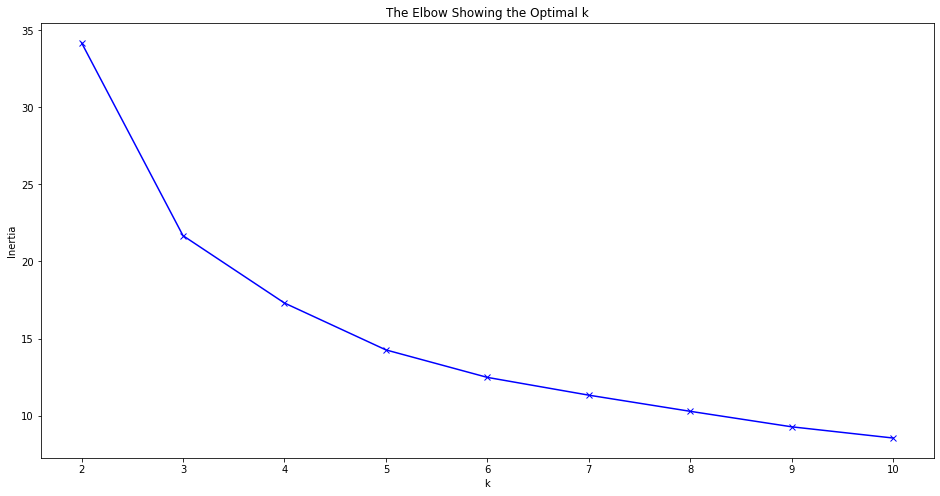

In [ ]:
distortions = []
K = range(2,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(cluster_check)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

In [ ]:
#import Silhouette
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.35698505318208845
For n_clusters = 3 The average silhouette_score is : 0.39387986294572314
For n_clusters = 4 The average silhouette_score is : 0.34340223119562285
For n_clusters = 5 The average silhouette_score is : 0.3349103015406544
For n_clusters = 6 The average silhouette_score is : 0.313317001732173
For n_clusters = 7 The average silhouette_score is : 0.2875419087170457
For n_clusters = 8 The average silhouette_score is : 0.28012216696661424
For n_clusters = 9 The average silhouette_score is : 0.28587449588826674
For n_clusters = 10 The average silhouette_score is : 0.28718360320680075


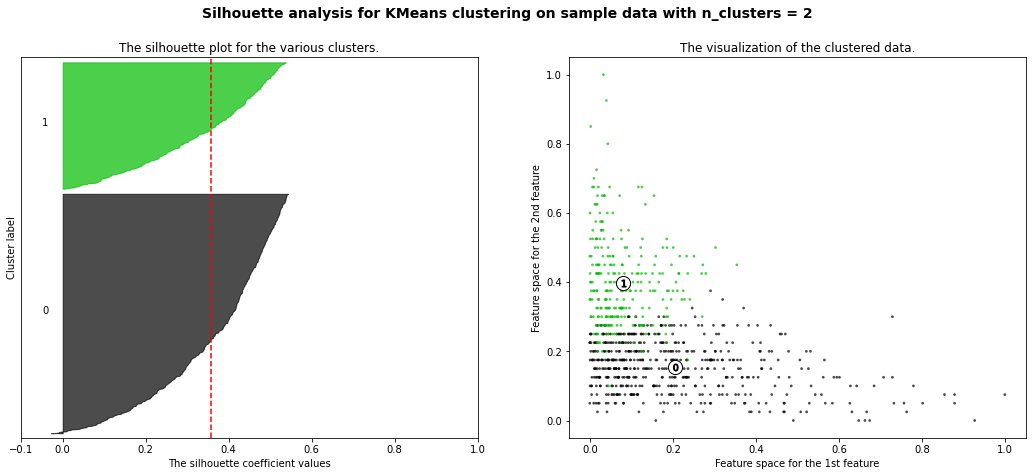

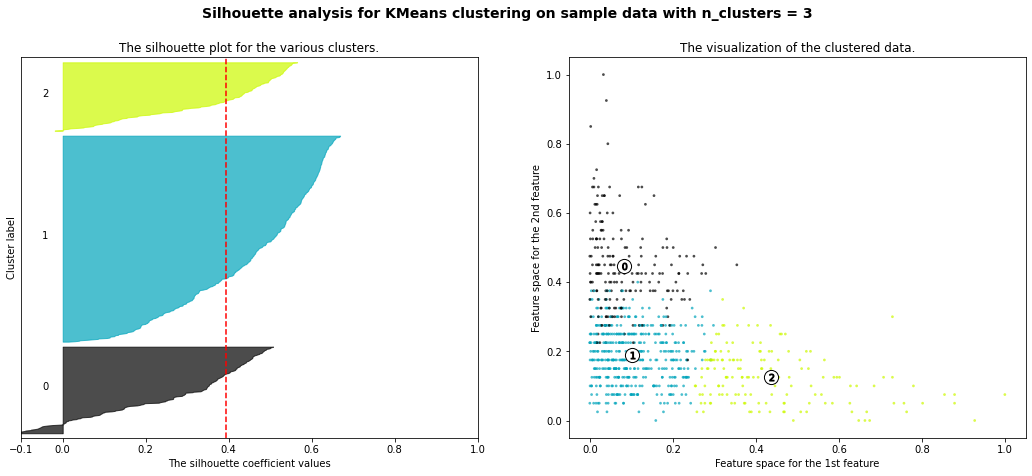

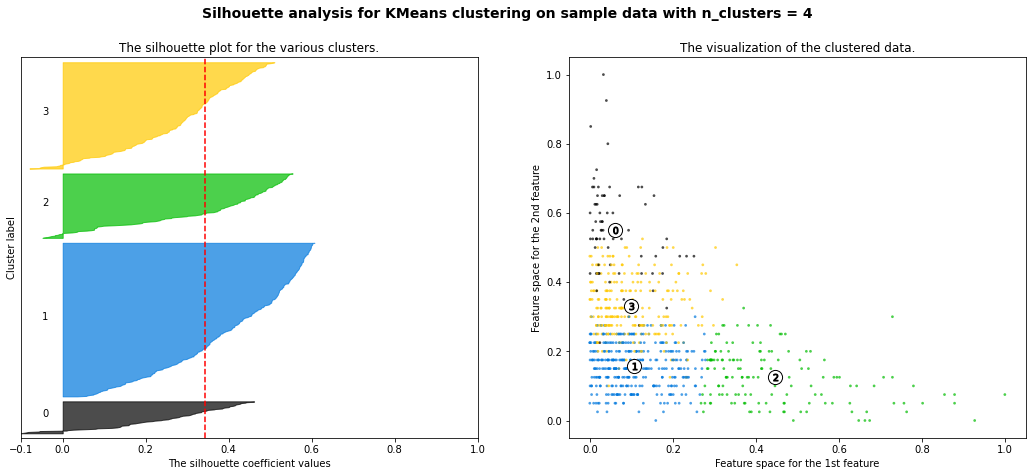

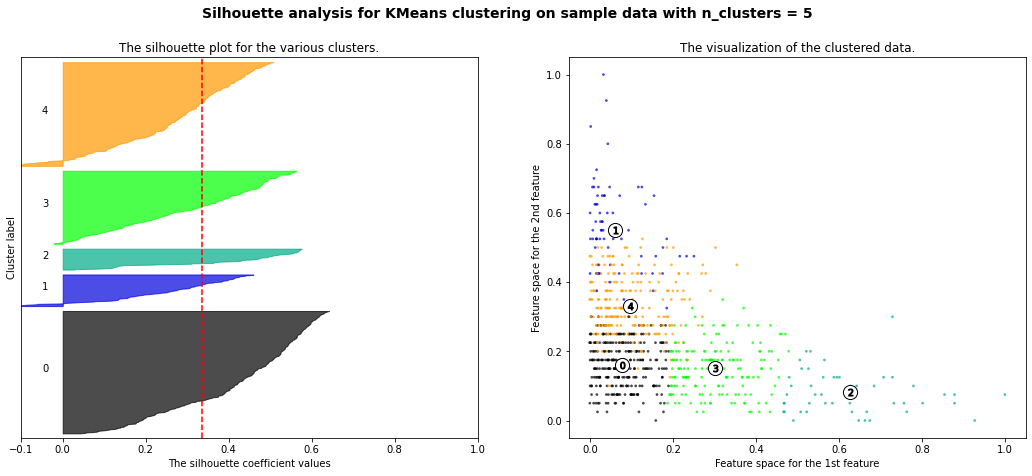

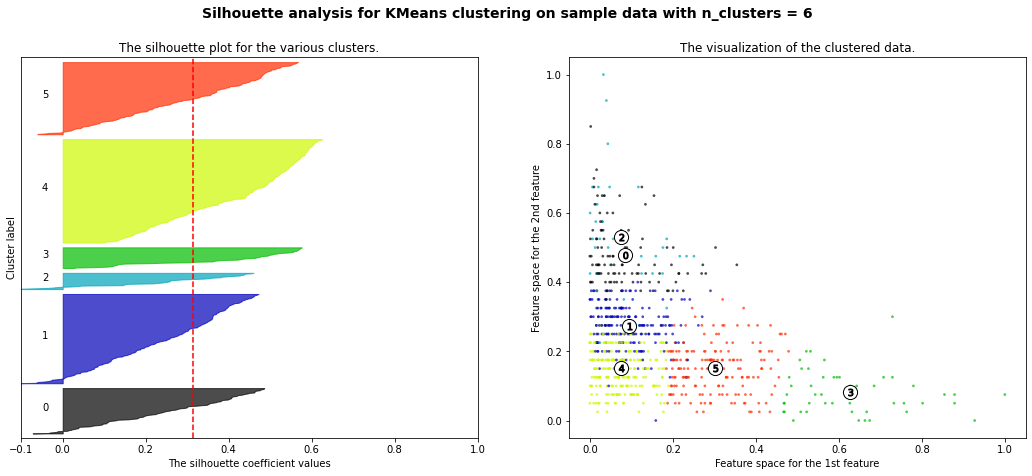

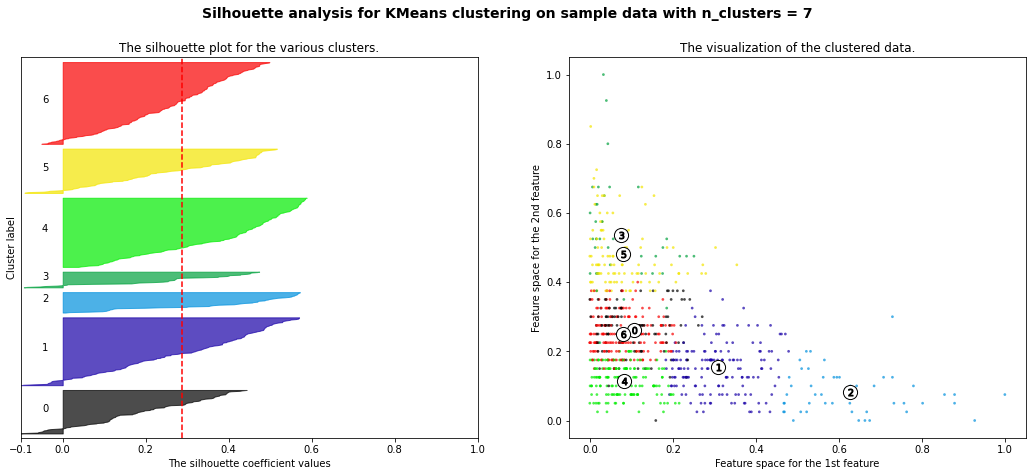

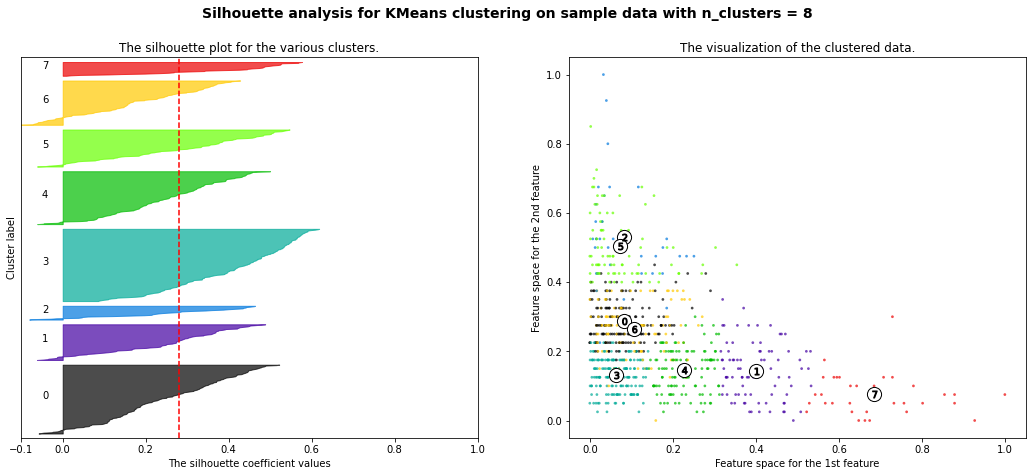

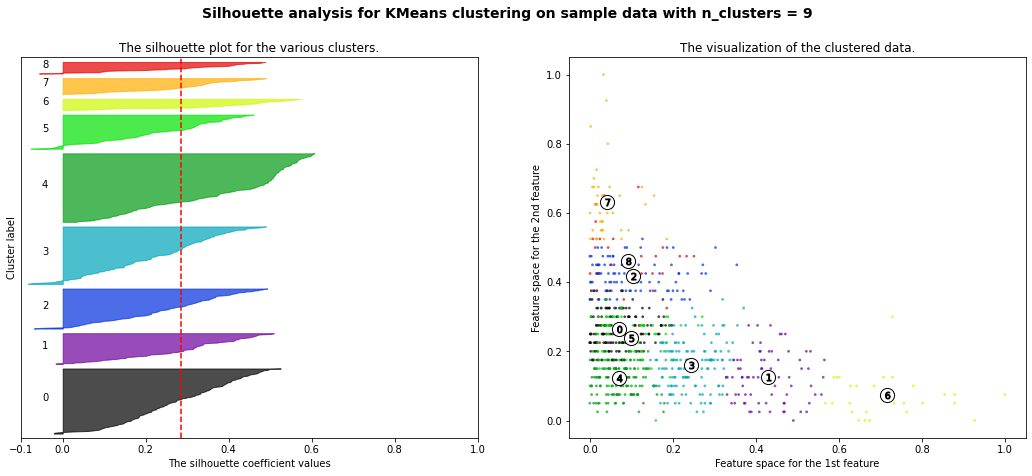

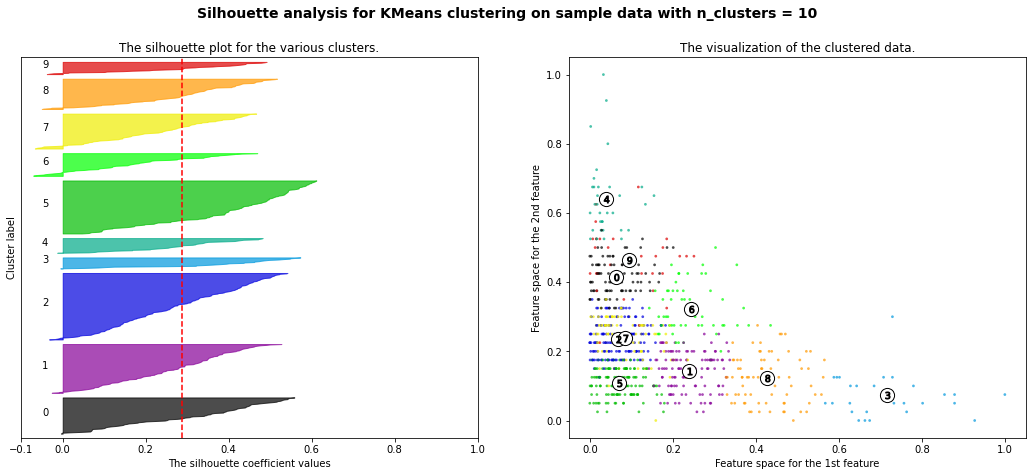

In [ ]:
  silhoutte_analysis(cluster_check,list(range(2,11)))

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3, random_state = 2)
cluster_model.fit(cluster_check)
cluster_label = cluster_model.labels_
cluster_join['cluster'] = cluster_label
cluster_join

,Customer ID,recency,frequency,monetary,cluster
0,1,356,13,8796.4200,0
1,2,150,4,15179.6100,0
2,3,450,5,6611.4365,2
3,4,61,33,55575.0880,1
4,5,39,8,14451.4165,0
...,...,...,...,...,...
790,791,318,6,2310.2300,0
791,792,251,9,27672.4400,0
792,793,139,11,9011.4200,0
793,794,34,6,4615.5400,0


<Figure size 1080x720 with 0 Axes>

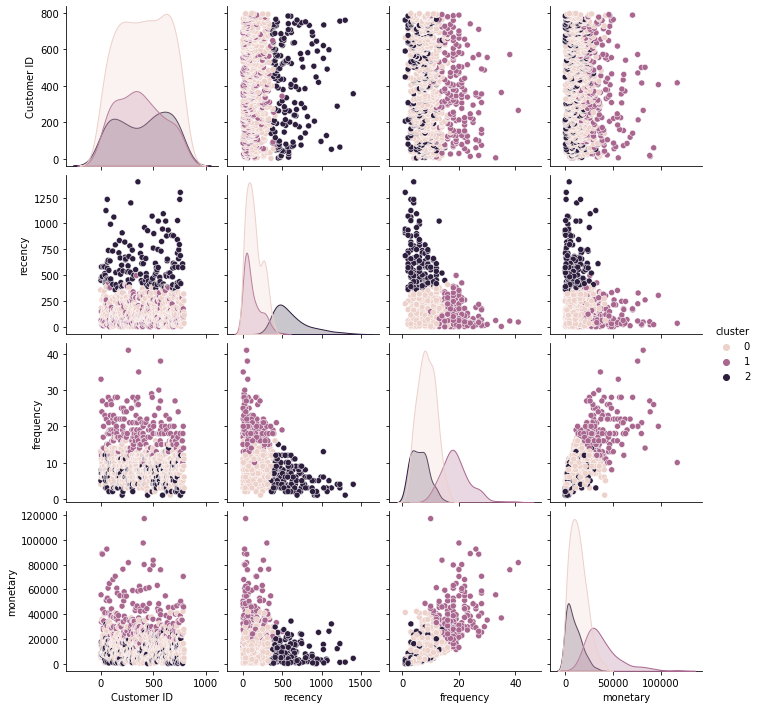

In [ ]:
#Segmentation Details
#Kmeans
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
cluster_join['cluster'] = kmeans.fit_predict(cluster_join[['recency', 'frequency', 'monetary']])

#cluster model
cluster_label = cluster_model.labels_
cluster_join['cluster'] = cluster_label
cluster_join['cluster']

#plotting
plt.figure(figsize=(15,10))
sns.pairplot(data=cluster_join, hue = 'cluster')
plt.show()

In [ ]:
cluster_join.groupby('cluster')['recency','frequency','monetary'].agg(['count','mean','median', 'max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


recency                               frequency                        \
          count        mean median   max  min     count       mean median max   
cluster                                                                         
0           450  142.268889  122.0   408    0       450   8.562222    8.0  17   
1           191  116.989529   78.0   497    0       191  18.869110   18.0  41   
2           154  609.811688  542.0  1403  356       154   6.116883    6.0  15   

            monetary                                                   
        min    count          mean       median         max       min  
cluster                                                                
0         1      450  13686.024002  12466.91500   42255.168     85.72  
1         8      191  38338.771688  33997.32300  117124.438  11448.06  
2         1      154   9312.887211   7603.38225   34398.050    125.90

In [ ]:
cluster_join['R_score'] = pd.qcut(cluster_join['recency'], 3, labels=[1, 2, 3]).astype(str)
cluster_join['F_score'] = pd.qcut(cluster_join['frequency'], 3, labels=[1, 2, 3]).astype(str)
cluster_join['M_score'] = pd.qcut(cluster_join['monetary'], 3, labels=[1, 2, 3]).astype(str)

cluster_join['RFM_score'] = cluster_join['R_score'] + cluster_join['F_score'] + cluster_join['M_score']

In [ ]:
def segment(x):
    if x == '122':
        return 'Dolphin'
    elif x in ['311', '312', '313']:
        return 'Seafood'
    elif x in ['111', '112', '113']:
        return 'Shrimps'
    elif x in ['323', '213', '223', '333', '133']:
        return 'Whales'
    elif x in ['221', '222', '321', '322', '332', '232', '331', '231', '132', '123' ]:
        return 'Orca'
    else:
        return 'Goldfish'

In [ ]:
cluster_join['segments'] = cluster_join['RFM_score'].apply(segment)
cluster_join['segments'].value_counts(normalize=True)*100

Orca        30.440252
Whales      22.012579
Goldfish    18.113208
Seafood     16.981132
Shrimps      7.547170
Dolphin      4.905660
Name: segments, dtype: float64

In [ ]:
segmentwise = cluster_join.groupby('segments').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('frequency', 'mean'),
                                          MonetaryMean = ('monetary', 'mean'),
                                          GroupSize = ('recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Dolphin,45.025641,9.256410,14158.074756,39
Goldfish,134.520833,10.479167,17006.180226,144
Orca,224.735537,11.268595,15953.849064,242
Seafood,564.111111,4.555556,8320.543941,135
Shrimps,47.850000,5.300000,8490.768025,60
Whales,147.074286,16.394286,36691.399823,175


We have 16.9%-Churn rate

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


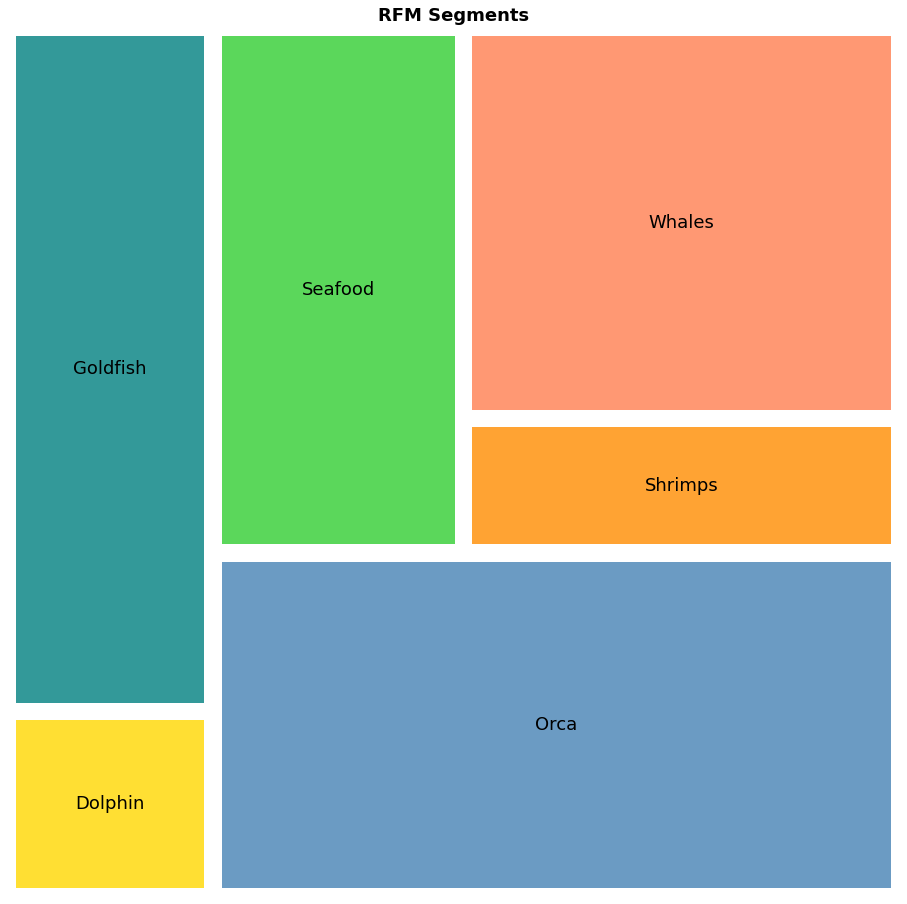

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral', 'magenta'],
              pad = 2,
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

#**LTV**

In [ ]:
cluster_join

,Customer ID,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFM_score,segments
0,1,356,13,8796.4200,0,3,3,1,331,Orca
1,2,150,4,15179.6100,0,2,1,2,212,Goldfish
2,3,450,5,6611.4365,2,3,1,1,311,Seafood
3,4,61,33,55575.0880,1,1,3,3,133,Whales
4,5,39,8,14451.4165,0,1,2,2,122,Dolphin
...,...,...,...,...,...,...,...,...,...,...
790,791,318,6,2310.2300,0,3,1,1,311,Seafood
791,792,251,9,27672.4400,0,2,2,3,223,Whales
792,793,139,11,9011.4200,0,2,2,1,221,Orca
793,794,34,6,4615.5400,0,1,1,1,111,Shrimps


In [ ]:
cluster_join = cluster_join.astype({'Customer ID':str})

In [ ]:
cluster_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  795 non-null    object 
 1   recency      795 non-null    int64  
 2   frequency    795 non-null    int64  
 3   monetary     795 non-null    float64
 4   cluster      795 non-null    int32  
 5   R_score      795 non-null    object 
 6   F_score      795 non-null    object 
 7   M_score      795 non-null    object 
 8   RFM_score    795 non-null    object 
 9   segments     795 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 97.5+ KB


In [ ]:
arpu = cluster_join.copy()
arpu['ARPU'] = arpu['monetary']/len(arpu)
arpu

,Customer ID,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFM_score,segments,ARPU
0,1,356,13,8796.4200,0,3,3,1,331,Orca,11.064679
1,2,150,4,15179.6100,0,2,1,2,212,Goldfish,19.093849
2,3,450,5,6611.4365,2,3,1,1,311,Seafood,8.316272
3,4,61,33,55575.0880,1,1,3,3,133,Whales,69.905771
4,5,39,8,14451.4165,0,1,2,2,122,Dolphin,18.177882
...,...,...,...,...,...,...,...,...,...,...,...
790,791,318,6,2310.2300,0,3,1,1,311,Seafood,2.905950
791,792,251,9,27672.4400,0,2,2,3,223,Whales,34.808101
792,793,139,11,9011.4200,0,2,2,1,221,Orca,11.335119
793,794,34,6,4615.5400,0,1,1,1,111,Shrimps,5.805711


In [ ]:
cltv = arpu.copy()
cltv['LTV'] = cltv['ARPU']/135
cltv

,Customer ID,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFM_score,segments,ARPU,LTV
0,1,356,13,8796.4200,0,3,3,1,331,Orca,11.064679,0.081961
1,2,150,4,15179.6100,0,2,1,2,212,Goldfish,19.093849,0.141436
2,3,450,5,6611.4365,2,3,1,1,311,Seafood,8.316272,0.061602
3,4,61,33,55575.0880,1,1,3,3,133,Whales,69.905771,0.517821
4,5,39,8,14451.4165,0,1,2,2,122,Dolphin,18.177882,0.134651
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,318,6,2310.2300,0,3,1,1,311,Seafood,2.905950,0.021526
791,792,251,9,27672.4400,0,2,2,3,223,Whales,34.808101,0.257838
792,793,139,11,9011.4200,0,2,2,1,221,Orca,11.335119,0.083964
793,794,34,6,4615.5400,0,1,1,1,111,Shrimps,5.805711,0.043005


In [ ]:
cltv['Churn'] = pd.qcut(cltv['LTV'], 3, labels=[1, 2, 3]).astype(str)

In [ ]:
def segment(x):
    if x == '1':
        return 'Churn'
    elif x in ['2']:
        return 'Retain'
    else:
        return 'Loyal'

In [ ]:
cltv

,Customer ID,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFM_score,segments,ARPU,LTV,Churn
0,1,356,13,8796.4200,0,3,3,1,331,Orca,11.064679,0.081961,1
1,2,150,4,15179.6100,0,2,1,2,212,Goldfish,19.093849,0.141436,2
2,3,450,5,6611.4365,2,3,1,1,311,Seafood,8.316272,0.061602,1
3,4,61,33,55575.0880,1,1,3,3,133,Whales,69.905771,0.517821,3
4,5,39,8,14451.4165,0,1,2,2,122,Dolphin,18.177882,0.134651,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,318,6,2310.2300,0,3,1,1,311,Seafood,2.905950,0.021526,1
791,792,251,9,27672.4400,0,2,2,3,223,Whales,34.808101,0.257838,3
792,793,139,11,9011.4200,0,2,2,1,221,Orca,11.335119,0.083964,1
793,794,34,6,4615.5400,0,1,1,1,111,Shrimps,5.805711,0.043005,1


In [ ]:
cltv['retain segments'] = cltv['Churn'].apply(segment)
cltv['retain segments'].value_counts(normalize=True)*100

Churn     33.333333
Retain    33.333333
Loyal     33.333333
Name: retain segments, dtype: float64

In [ ]:
cltv

,Customer ID,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFM_score,segments,ARPU,LTV,Churn,retain segments
0,1,356,13,8796.4200,0,3,3,1,331,Orca,11.064679,0.081961,1,Churn
1,2,150,4,15179.6100,0,2,1,2,212,Goldfish,19.093849,0.141436,2,Retain
2,3,450,5,6611.4365,2,3,1,1,311,Seafood,8.316272,0.061602,1,Churn
3,4,61,33,55575.0880,1,1,3,3,133,Whales,69.905771,0.517821,3,Loyal
4,5,39,8,14451.4165,0,1,2,2,122,Dolphin,18.177882,0.134651,2,Retain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,318,6,2310.2300,0,3,1,1,311,Seafood,2.905950,0.021526,1,Churn
791,792,251,9,27672.4400,0,2,2,3,223,Whales,34.808101,0.257838,3,Loyal
792,793,139,11,9011.4200,0,2,2,1,221,Orca,11.335119,0.083964,1,Churn
793,794,34,6,4615.5400,0,1,1,1,111,Shrimps,5.805711,0.043005,1,Churn


In [ ]:
df = pd.DataFrame(cltv).reset_index()
df.to_csv ('cltv.csv')